In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import cv2

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, MaxPooling2D, Dropout, Cropping2D

In [2]:
def load_data(datafile):
    ''' 
    datafile: path to driving_log.csv
    
    Return: dataframe with 90% of steering angle less than 0.01 removed
    '''
    # skipped first row since udacity's data contains header but my own data does not
    data = pd.read_csv(datafile)
    # get indices of rows with steering angle less than 0.01
    indices = []
    for i in data.index:
        if -0.01 < data.iloc[i, 3] < 0.01 :
    #     if data.iloc[i, 3] == 0:
            indices.append(i)
        
    # randome generate 80% of the indices
    index_to_remove = sorted(np.random.choice(indices, int(0.9*len(indices)), replace=False))

    # remove the rows with index above
    return data.drop(data.index[index_to_remove], inplace=False) 

In [3]:
def view_hist(data):
    '''   
    data: dataframe
    
    plot the histogram of steering angles
    '''
    dist = np.array(data1.iloc[:,3])
    plt.figure(figsize=(10,7))
    plt.hist(dist, 50, align='mid' )
    plt.show()

In [ ]:
'''
    
    for path, m in zip(data.iloc[:, 0], data.iloc[:, 3]):
        img_path = 'best_data\\IMG\\' + path.split('\\')[-1]
        
        img = cv2.imread(img_path)
        images.append(img)
        measurements.append(float(m))
        
        # flip the image over
        img_flipped = np.fliplr(img)
        images.append(img_flipped)
        measurements.append(-float(m))
'''

In [4]:
data1 = load_data('./data/best_data/driving_log.csv')

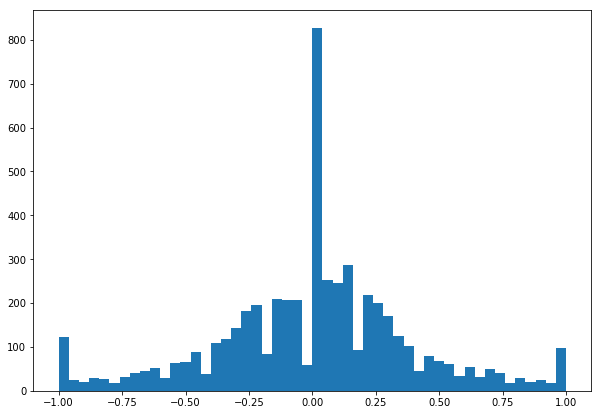

In [5]:
view_hist(data1)

In [6]:
images = []
measurements = []

In [8]:
for path, m in zip(data1.iloc[:, 0], data1.iloc[:, 3]):
    img_path = 'best_data\\IMG\\' + path.split('\\')[-1]

    img = cv2.imread(img_path)
    images.append(img)
    measurements.append(float(m))

    # flip the image over
    img_flipped = np.fliplr(img)
    images.append(img_flipped)
    measurements.append(-float(m))

In [9]:
# a quick test
X_train, y_train = np.array(images), np.array(measurements)

In [14]:
drop_prob = 0.5
model = Sequential()
# preprocessing layer

# cropping2D layer
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160, 320, 3)))
# normalisation and centraling
model.add(Lambda(lambda x: x / 255.0 - 0.5))
  # conv1 depth: 8, kernel=5*5
model.add(Conv2D(6, 8, 15, activation='relu'))
# max_pooling          
model.add(MaxPooling2D((5, 5)))
# dropout
model.add(Dropout(drop_prob))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(drop_prob))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3, batch_size=64)


Train on 8651 samples, validate on 2163 samples
Epoch 1/3
 448/8651 [>.............................] - ETA: 440s - loss: 0.1114

In [16]:
model.save('model.h5')
print('model saved')

model saved
